## EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Data/cleanedHealthData.csv")

In [3]:
df.head()

,age,gender,height,weight,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,...,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,gene_marker_flag,daily_supplement_dosage,target
0,56,Male,173.416872,56.886640,18.989117,72.165130,118.264254,60.749825,214.580523,103.008176,...,Poor,No,High,5,Moderate,No,Yes,1.0,-2.275502,healthy
1,69,Female,163.207380,97.799859,36.511417,85.598889,117.917986,66.463696,115.794002,116.905134,...,Moderate,No,High,5,High,Yes,No,1.0,6.239340,healthy
2,46,Male,177.281966,80.687562,25.587429,90.295030,123.073698,76.043212,138.134787,89.180302,...,Good,Yes,High,4,Moderate,No,No,1.0,5.423737,healthy
3,32,Female,172.101255,63.142868,21.177109,100.504211,148.173453,68.781981,203.017447,128.375798,...,Moderate,No,High,1,Missing,No,Yes,1.0,8.388611,healthy
4,60,Female,163.608816,40.000000,14.844299,69.021150,150.613181,92.335358,200.412439,94.813332,...,Moderate,Yes,High,1,High,Yes,Yes,1.0,0.332622,healthy


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      100000 non-null  int64  
 1   gender                   100000 non-null  object 
 2   height                   100000 non-null  float64
 3   weight                   100000 non-null  float64
 4   bmi_corrected            100000 non-null  float64
 5   waist_size               100000 non-null  float64
 6   blood_pressure           92331 non-null   float64
 7   heart_rate               85997 non-null   float64
 8   cholesterol              100000 non-null  float64
 9   glucose                  100000 non-null  float64
 10  insulin                  84164 non-null   float64
 11  sleep_hours              100000 non-null  float64
 12  sleep_quality            100000 non-null  object 
 13  work_hours               100000 non-null  float64
 14  physi

In [7]:
## Split Features
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

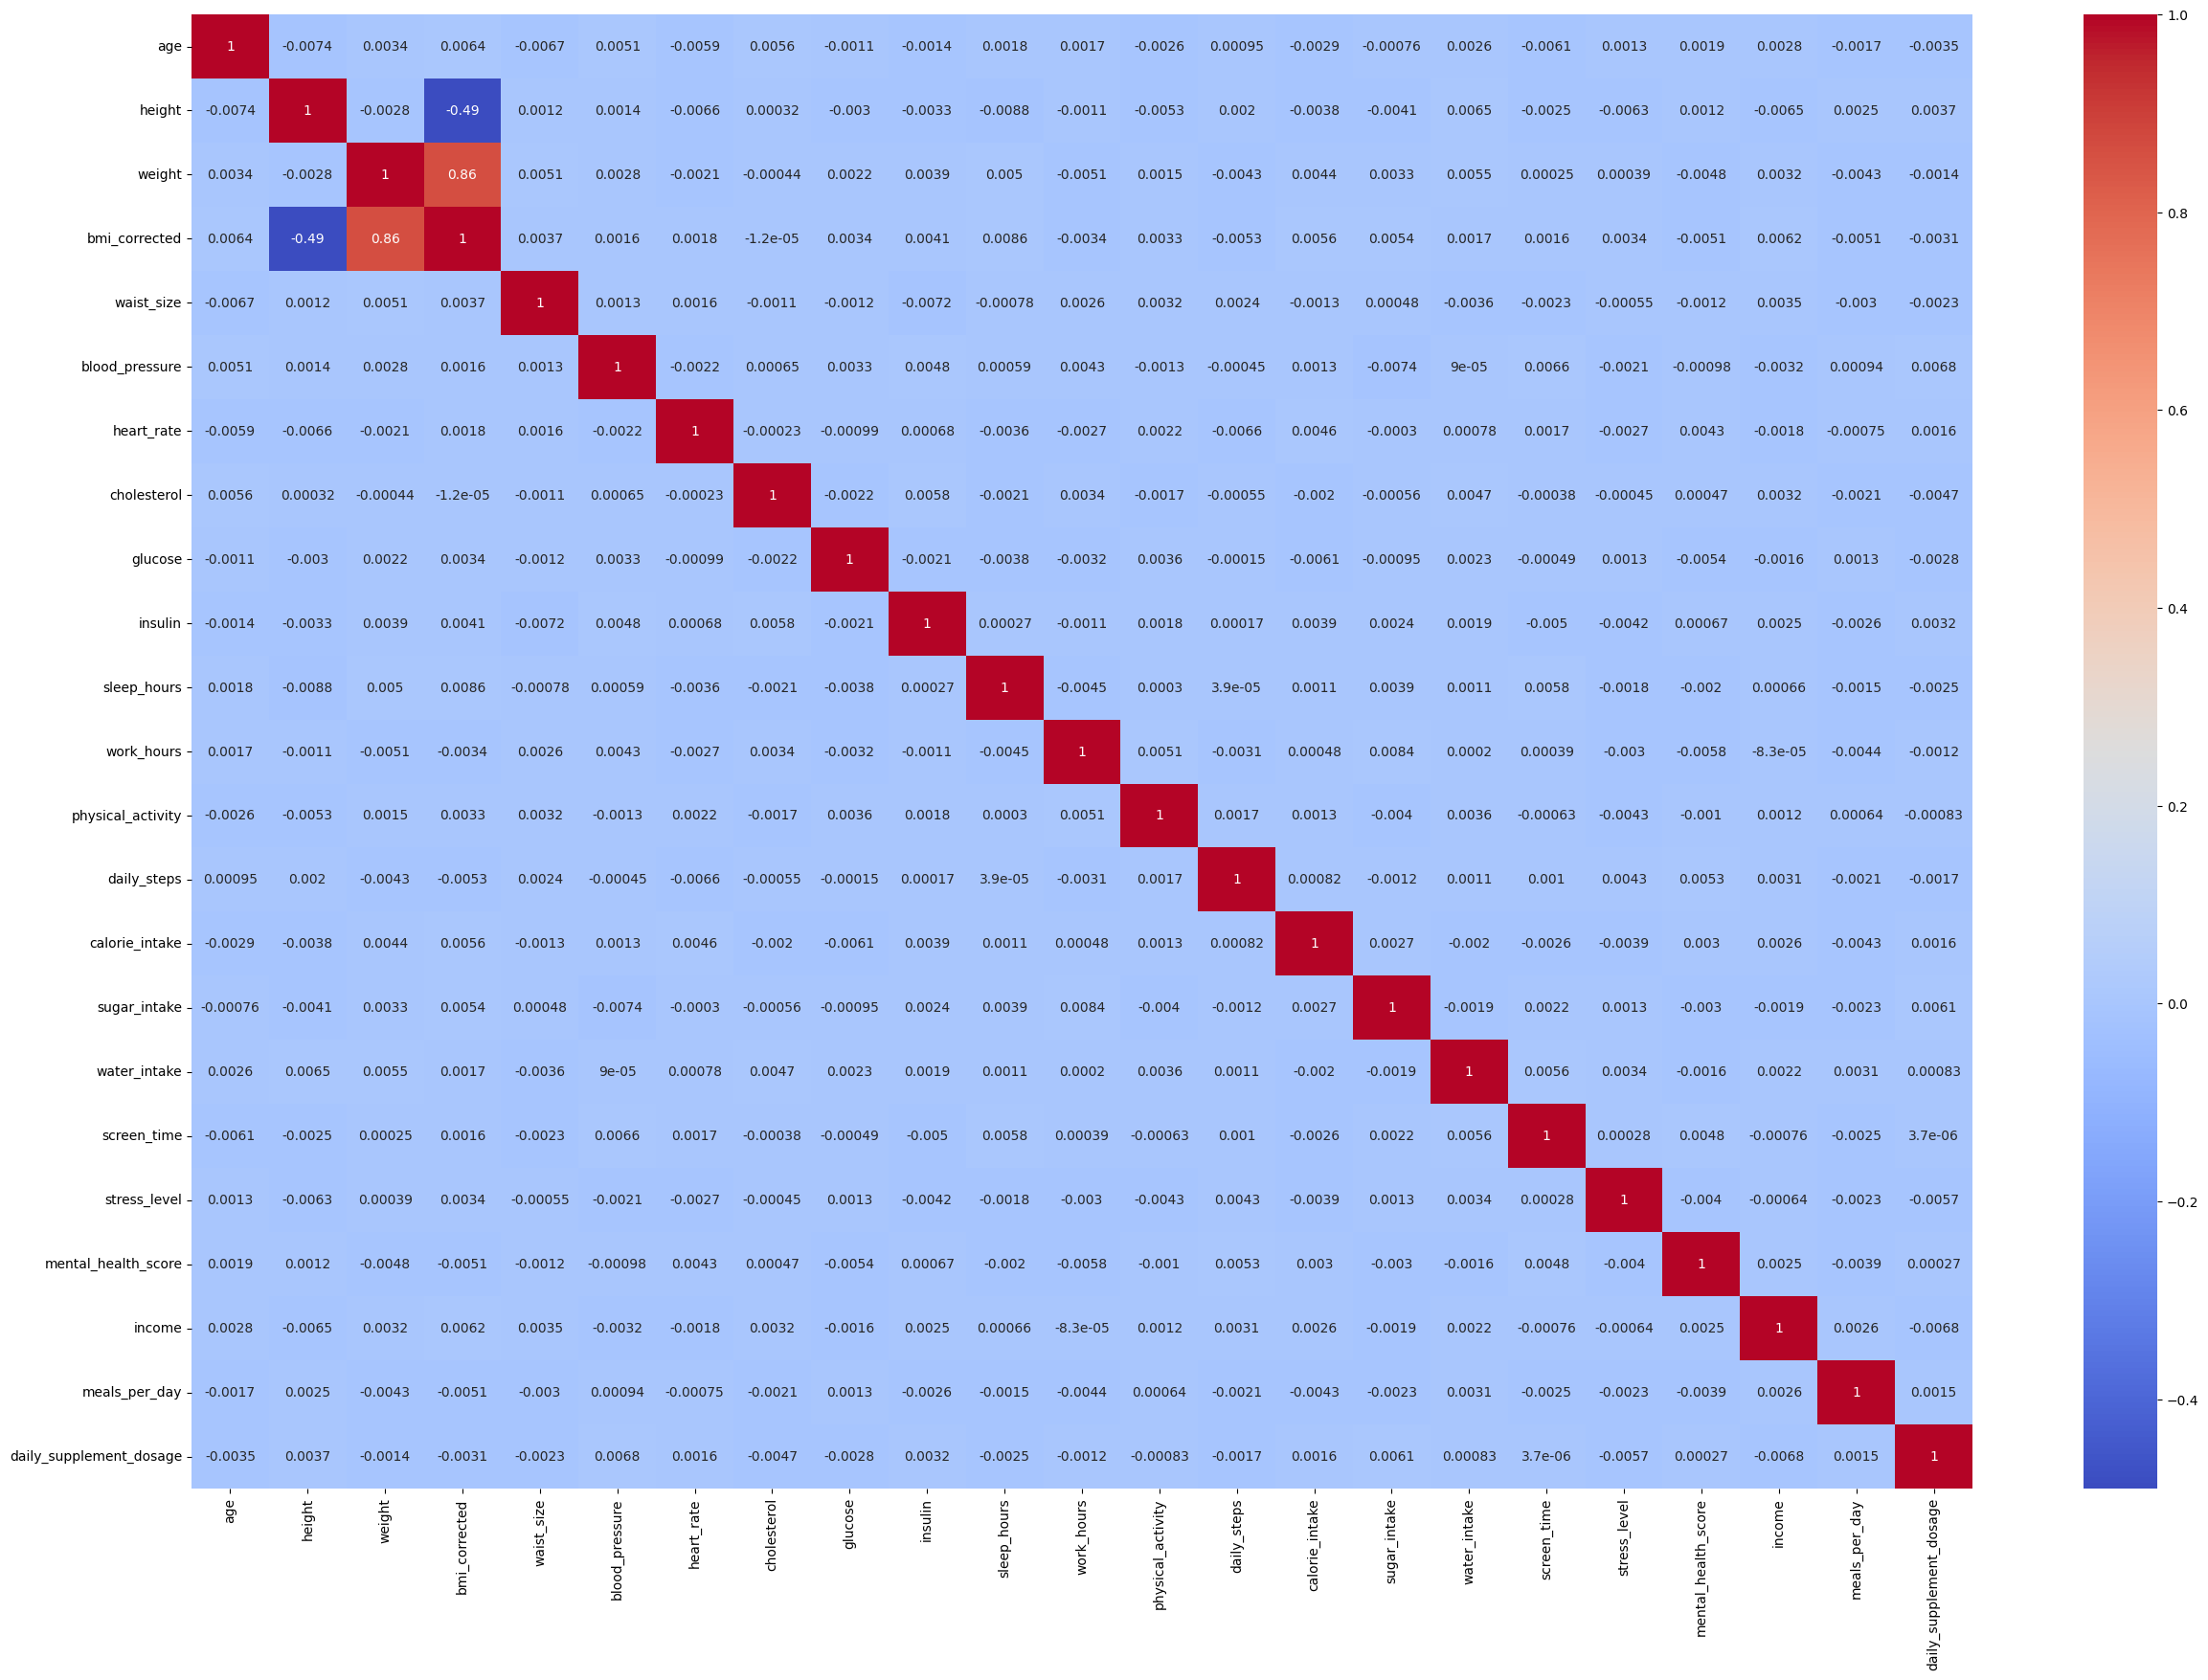

In [ ]:
## Correlation on numerical features
plt.figure(figsize=(30,20))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

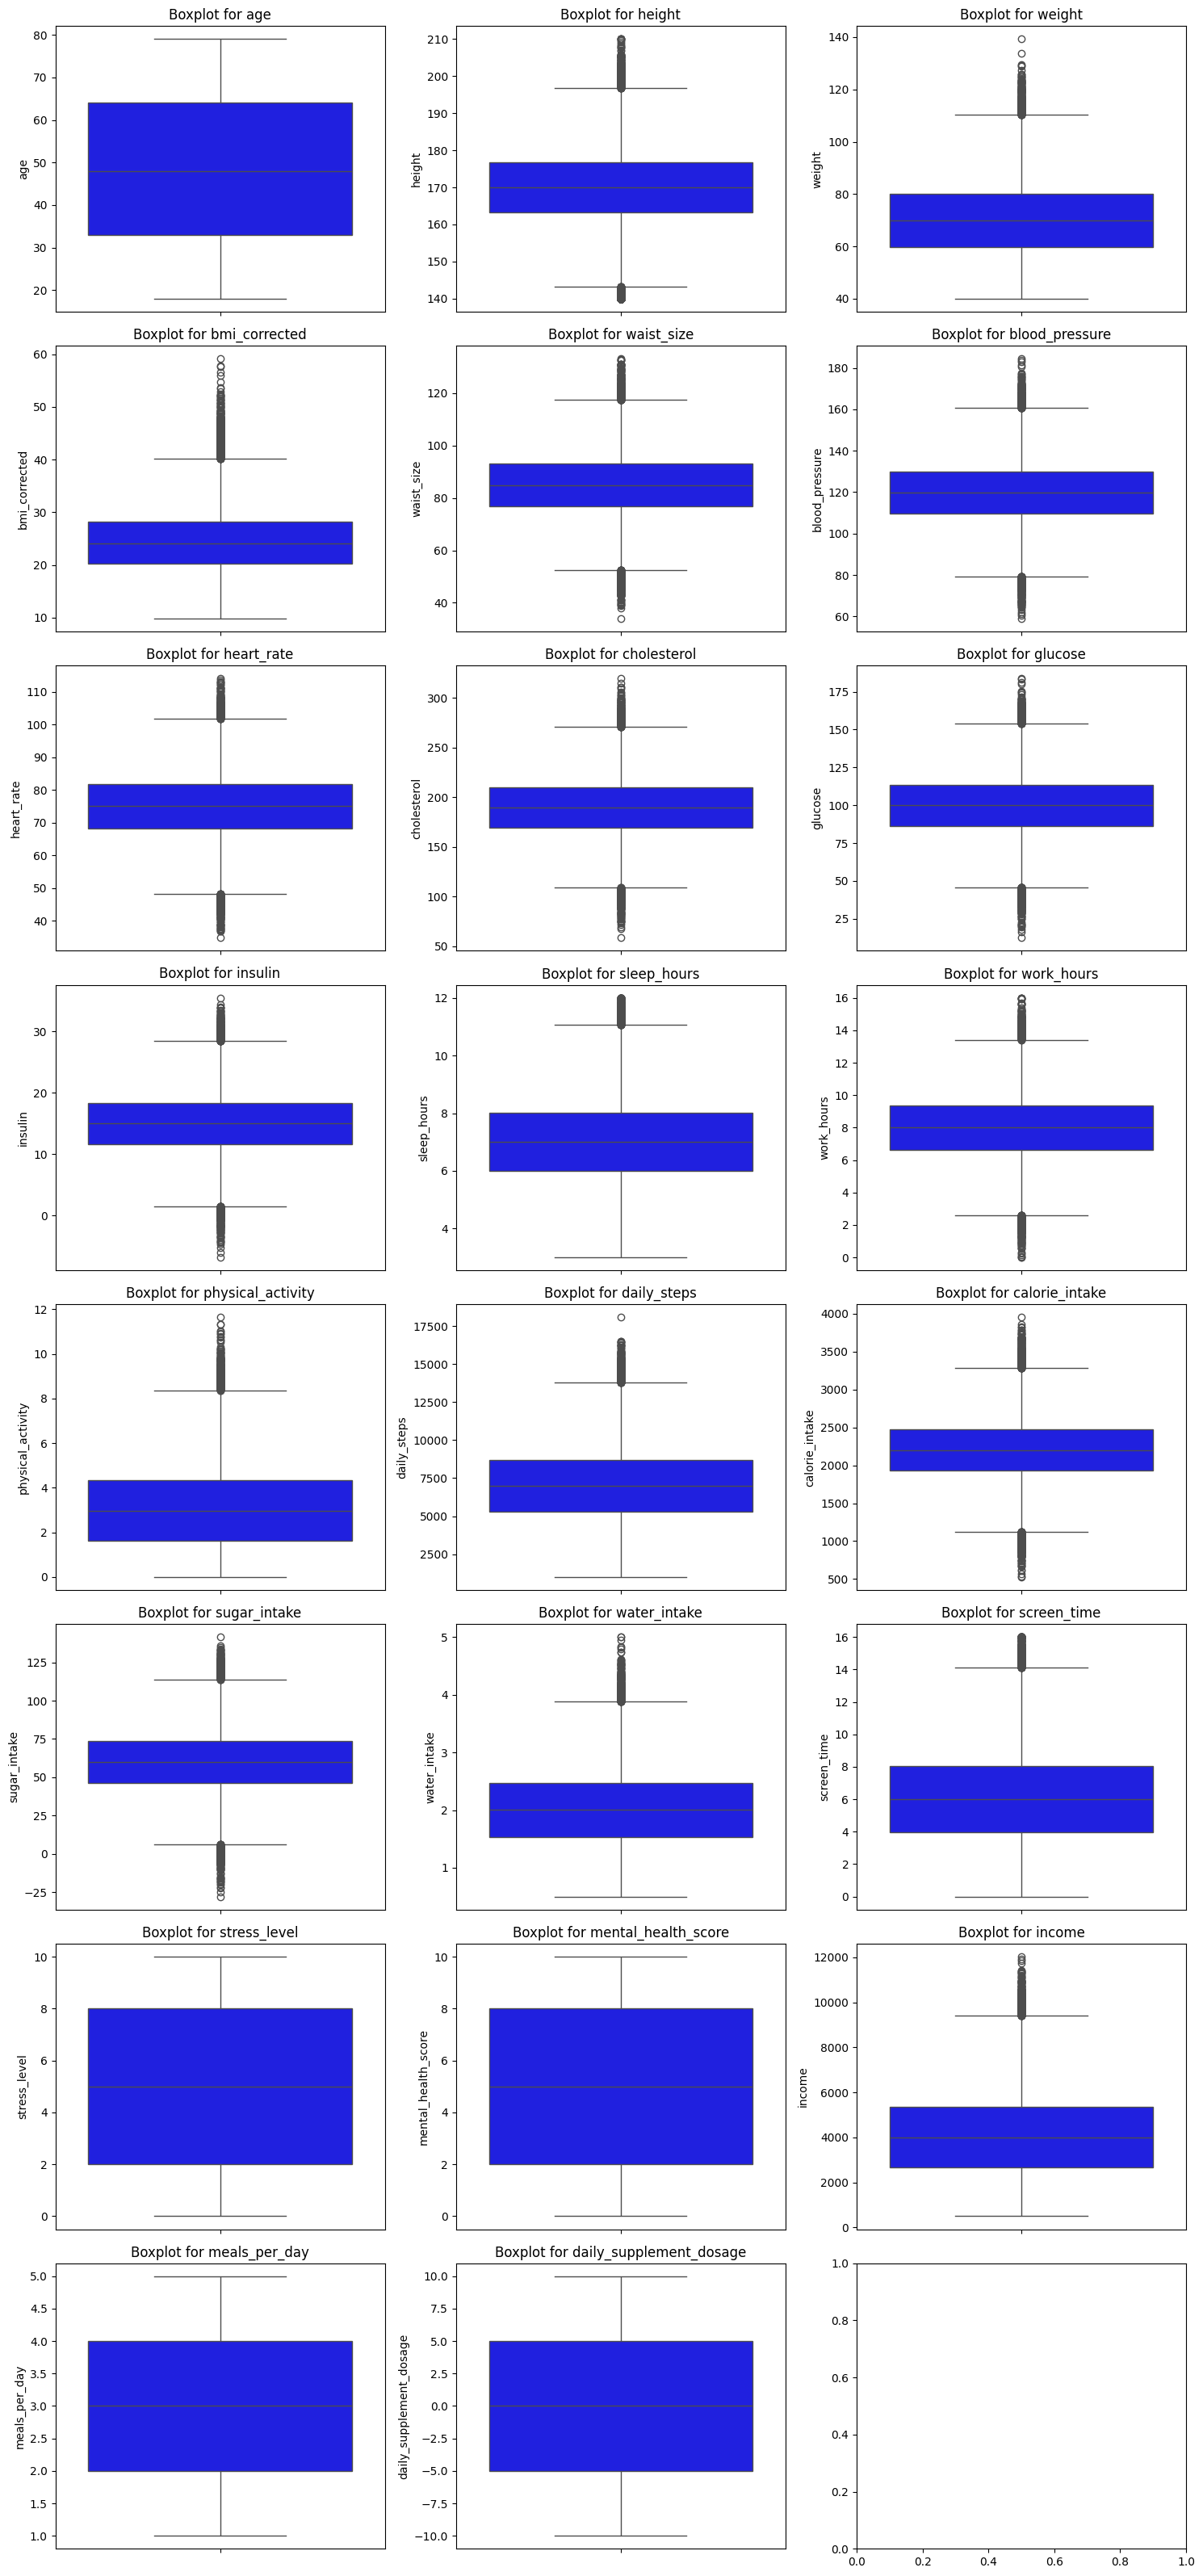

In [ ]:
## Boxplot for numerical features

n = len(numerical_cols)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots( rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='blue')
    axes[i].set_title(f"Boxplot for {col}")

plt.tight_layout()
plt.show()

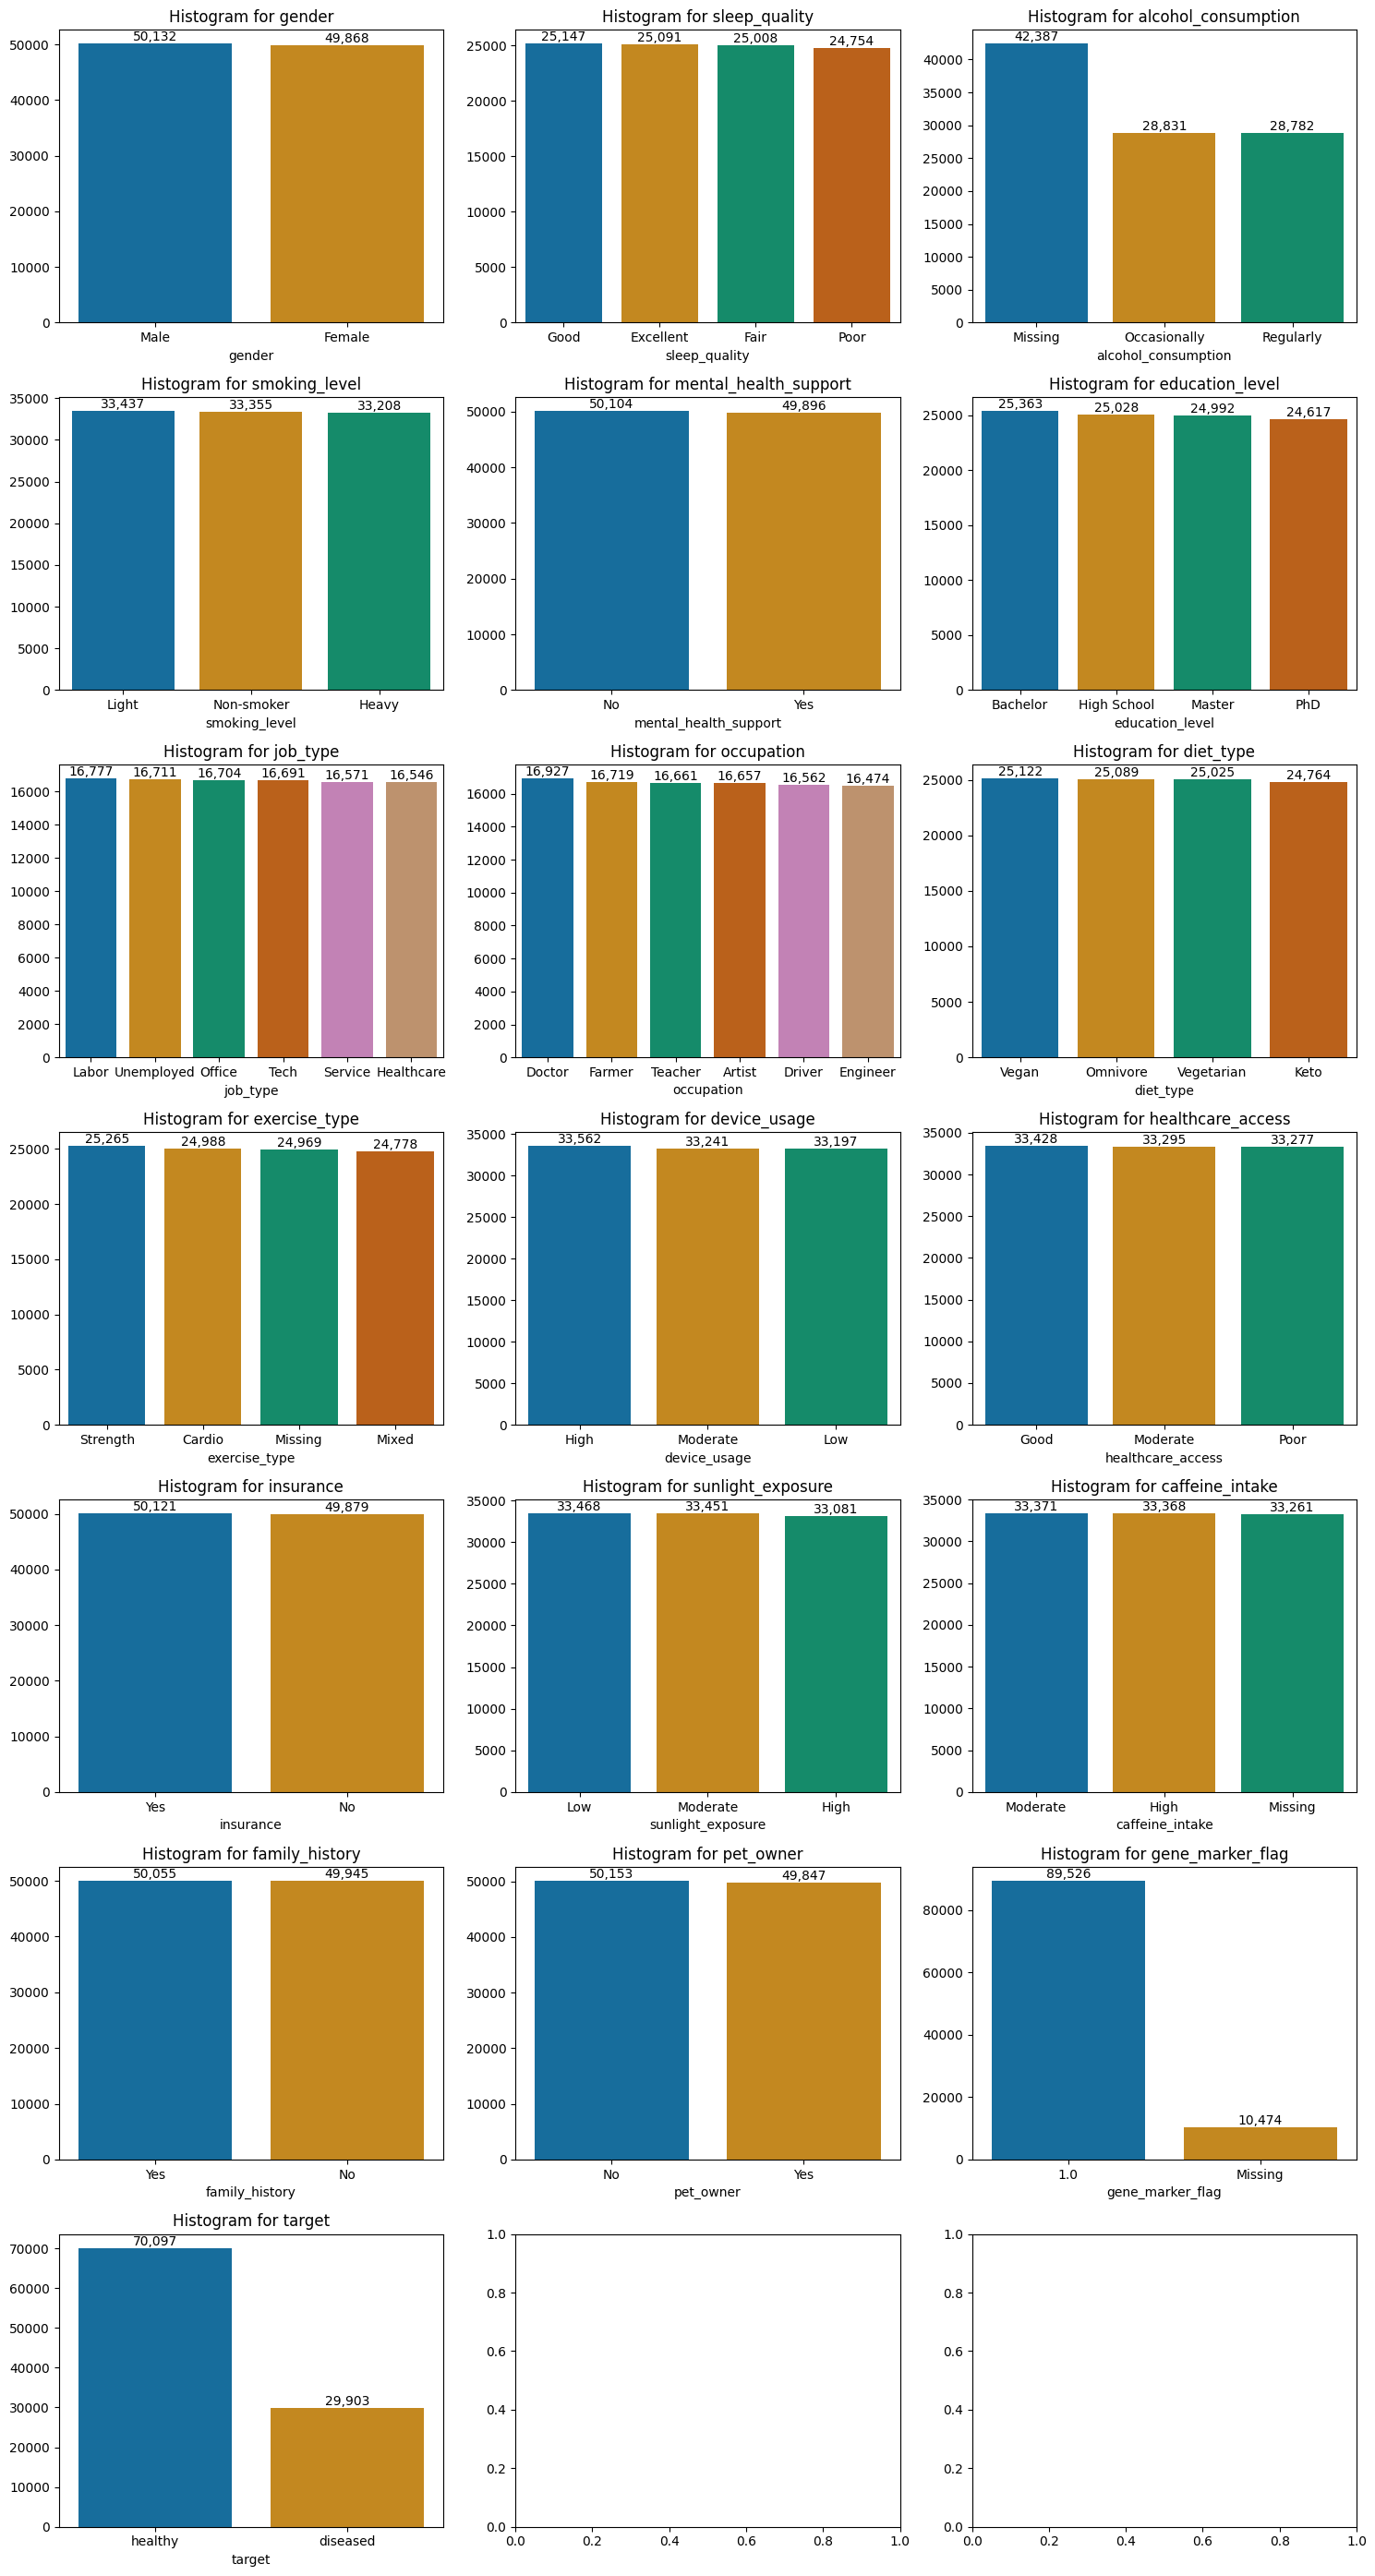

In [45]:
## Histogram for categorical features

n = len(categorical_cols)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots( rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    counts = df[col].value_counts()
    sns.barplot(data=pd.DataFrame(counts), x=counts.index, y=counts.values, hue=col, legend=False, ax=axes[i], palette='colorblind')
    axes[i].set_title(f"Histogram for {col}")

    for idx, val in enumerate(counts.values):
        axes[i].text(idx, val - 0.2, f"{val:,}", ha='center', va='bottom')


plt.tight_layout()
plt.show()